# Latar Belakang

Sebuah perusahaan SaaS yang menjual dan memasarkan software kepada perusahaan lain (B2B) ingin mengetahui cara untuk optimasisasi Profit dan Profit dari perusahaan tersebut.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kstest

import warnings
warnings.filterwarnings("ignore")

Dataset berisi:

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Profit: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

### Dataset

In [3]:
df = pd.read_csv('SaaS-Sales.csv', parse_dates=['Order Date'])
df = df.drop(columns=['Row ID','Date Key'])
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### Data understanding and cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

In [5]:
display(df.describe(), df.describe(include='object'))

,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,1049.771963,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,1076.000000,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,29.719388,623.245101,2.225110,0.206452,234.260108


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


In [6]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bel

### Checking duplicate data

In [7]:
df.duplicated().sum()

np.int64(0)

### Checking Outliers

**Outliers in Sales column**

In [8]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]

outliers

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
11,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,JG14MOU94R,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,AMER-2021-104948,2021-11-13,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,1004,Tech,SMB,Marketing Suite,3D56KMLTYI,683.3320,4,0.15,-40.1960
9942,AMER-2020-143371,2020-12-28,Carol Forsyth,United States,San Francisco,AMER,NAMER,Nestle,1089,Consumer Products,SMB,Marketing Suite - Gold,UPQPITMHDF,998.8200,9,0.00,29.9646
9947,APJ-2023-121559,2023-06-02,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,1093,Energy,Strategic,FinanceHub,ZTX5WHU4ZQ,1925.8800,6,0.00,539.2464
9948,APJ-2023-121559,2023-06-02,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,1093,Energy,Strategic,OneView,ZGTMROAYTX,2405.2000,8,0.00,793.7160


**Outliers in Profit column**

In [9]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Profit'] < (Q1 - 1.5 * IQR)) | (df['Profit'] > (Q3 + 1.5 * IQR))]

outliers

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
13,AMER-2022-161389,2022-12-06,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,1066,Tech,SMB,ContactMatcher,COK66F8IC1,407.9760,3,0.20,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,EMEA-2020-143287,2020-11-11,Carl Ince,United Kingdom,Leicester,EMEA,UKIR,Intel,1051,Tech,Enterprise,Support,Y7P04IW9QA,223.9200,4,0.00,109.7208
9962,APJ-2021-168088,2021-03-19,Harry Buckland,Japan,Tokyo,APJ,JAPN,News Corp.,1071,Misc,Enterprise,Marketing Suite,X3DQP9NR9A,383.4656,4,0.32,-67.6704
9968,AMER-2023-153871,2023-12-12,Connor Paige,Argentina,Rosario,AMER,LATAM,AT&T,1010,Communications,SMB,ContactMatcher,X2Y98BQ3KE,735.9800,2,0.00,331.1910
9979,AMER-2022-103674,2022-12-07,Lisa Peake,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,Enterprise,ContactMatcher,8PH8DQWA5Q,437.4720,14,0.20,153.1152


**Outliers in Quantity**

In [10]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))]

outliers

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
113,AMER-2020-115259,2020-08-25,Rebecca Dickens,Mexico,Mexico City,AMER,LATAM,Amazon,1004,Tech,SMB,Storage,1DRXSUGWY6,40.096,14,0.2,14.5348
139,AMER-2022-145583,2022-10-14,Rose Scott,United States,Aurora,AMER,NAMER,CVS Health,1026,Retail,SMB,SaaS Connector Pack,6LLWK12W7K,43.120,14,0.0,20.6976
147,EMEA-2022-114489,2022-12-06,Joseph Duncan,Italy,Rome,EMEA,EU,Walmart,1096,Retail,Strategic,Site Analytics,NKEP466WY8,384.450,11,0.0,103.8015
251,AMER-2022-145625,2022-09-12,Penelope Nash,United States,Seattle,AMER,NAMER,Home Depot,1047,Retail,SMB,Data Smasher,4LV39UJCC2,3347.370,13,0.0,636.0003
329,EMEA-2022-141544,2022-08-31,Peter McLean,France,Paris,EMEA,EU-WEST,Pfizer,1074,Healthcare,SMB,FinanceHub,QWKHH67GTN,100.240,10,0.2,33.8310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,EMEA-2020-153927,2020-08-12,Carol Edmunds,Finland,Tampere,EMEA,NOR,Aetna,1002,Healthcare,SMB,Data Smasher,ODBIOWD25K,272.610,13,0.0,98.1396
9895,APJ-2020-115049,2020-09-26,Faith Robertson,Australia,Sydney,APJ,ANZ,Anthem,1029,Healthcare,SMB,Data Smasher,2RJMI934DR,153.824,11,0.2,38.4560
9941,AMER-2023-164028,2023-11-25,Gordon Parr,United States,Los Angeles,AMER,NAMER,Aetna,1002,Healthcare,SMB,Data Smasher,YKQKKEWGZQ,223.580,14,0.0,87.1962
9979,AMER-2022-103674,2022-12-07,Lisa Peake,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,Enterprise,ContactMatcher,8PH8DQWA5Q,437.472,14,0.2,153.1152


**Outliers in Discount**

In [11]:
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Discount'] < (Q1 - 1.5 * IQR)) | (df['Discount'] > (Q3 + 1.5 * IQR))]

outliers

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
14,APJ-2021-118983,2021-11-22,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,D8FGC56NNX,68.810,5,0.8,-123.8580
15,APJ-2021-118983,2021-11-22,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,NRKT5R1A1G,2.544,3,0.8,-3.8160
28,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,ContactMatcher,BGL4P1U2CZ,9.618,2,0.7,-7.0532
32,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,ContactMatcher,GPQ0TDTGIM,6.858,6,0.7,-5.7150
36,APJ-2022-117590,2022-12-09,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,1077,Consumer Products,Strategic,SaaS Connector Pack,TKN9K1JO1D,190.920,5,0.6,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,AMER-2020-114195,2020-11-01,Lily Paterson,Mexico,Mexico City,AMER,LATAM,Carrefour,1048,Retail,Strategic,ContactMatcher,30UO6KU6SK,22.428,3,0.7,-17.9424
9877,AMER-2023-166324,2023-04-21,Edward Hardacre,Mexico,Tijuana,AMER,LATAM,Trafigura Group,1100,Finance,Enterprise,ContactMatcher,A5CKR3PPW8,8.700,5,0.7,-6.3800
9903,APJ-2020-122609,2020-11-12,Brian Dickens,Japan,Kyoto,APJ,JAPN,Siemens,1043,Manufacturing,SMB,SaaS Connector Pack,MUKTG0SU3Z,25.128,3,0.6,-6.9102
9920,APJ-2022-149272,2022-03-16,Pippa Edmunds,Japan,Hiroshima,APJ,JAPN,BNP Paribas,1065,Finance,Strategic,ContactMatcher,9OC763CXCJ,22.386,7,0.8,-35.8176


All outliers are kept in the dataset since it is a big portion of the data and will be used later on in the analysis

In [12]:
df.to_csv('AWS SaaS Sales - cleaned.xls', index=False)

In [13]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Secara umum, kita bisa melihat bahwa:
* dataset SaaS Sales memiliki 19 kolom dan 9.994 baris
* dataset tidak memiliki kolom yang kosong
* dataset tidak memiliki data duplikat
* kolom 'Order Date' menunjukkan tanggal pemesanan dan sudah diubah ke dalam date format
* Produk yang paling banyak dibeli adalah Contact Matcher dan paling sedikit dibeli adalah Alchemy

### Detecting data distribution normality

Ho = Distribusi Normal =

Ha = Distribusi Tidak Normal =/=

In [14]:
from scipy.stats import kstest

#### Sales

In [15]:
st, pval = kstest(df['Sales'], 'norm')
if pval > 0.05:
    print(f"Nilai pvalue = {pval} : Asumsi : Kita tidak memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Normal (Terima H0)")
else:
    print(f"Nilai pvalue = {pval} : Asumsi : Kita memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Tidak Normal (Tolak H0)") 

Nilai pvalue = 0.0 : Asumsi : Kita memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Tidak Normal (Tolak H0)


#### Discount

In [16]:
st, pval = kstest(df['Discount'], 'norm')
if pval > 0.05:
    print(f"Nilai pvalue = {pval} : Asumsi : Kita tidak memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Normal (Terima H0)")
else:
    print(f"Nilai pvalue = {pval} : Asumsi : Kita memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Tidak Normal (Tolak H0)") 

Nilai pvalue = 0.0 : Asumsi : Kita memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Tidak Normal (Tolak H0)


#### Profit

In [17]:
st, pval = kstest(df['Profit'], 'norm')
if pval > 0.05:
    print(f"Nilai pvalue = {pval} : Asumsi : Kita tidak memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Normal (Terima H0)")
else:
    print(f"Nilai pvalue = {pval} : Asumsi : Kita memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Tidak Normal (Tolak H0)") 

Nilai pvalue = 0.0 : Asumsi : Kita memiliki cukup bukti untuk menolak H0, sehingga asumsi distribusi cenderung Tidak Normal (Tolak H0)


### Checking data correlation

Tes korelasi menggunakan spearman karena data tidak terdistribusi dengan normal (non-parametrik)

In [18]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].corr('spearman')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.327426,-0.056969,0.518407
Quantity,0.327426,1.000000,-0.000878,0.234491
Discount,-0.056969,-0.000878,1.000000,-0.543350
Profit,0.518407,0.234491,-0.543350,1.000000


Result:
- Korelasi sedang positif antara sales dengan profit
- Korelasi lemah negatif antara sales dengan discount
- Korelasi sedang negatif antara discount dengan profit

In [19]:
product_count = df.value_counts('Product')
product_count

Product
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64

In [20]:
monthly_sales = df.groupby('Order Date')['Sales'].sum()
monthly_sales

Order Date
2020-01-04      16.4480
2020-01-05     288.0600
2020-01-06      19.5360
2020-01-07    4407.1000
2020-01-08      87.1580
                ...    
2023-12-27     814.5940
2023-12-28     177.6360
2023-12-29    1657.3508
2023-12-30    2915.5340
2023-12-31     713.7900
Name: Sales, Length: 1237, dtype: float64

### Sales

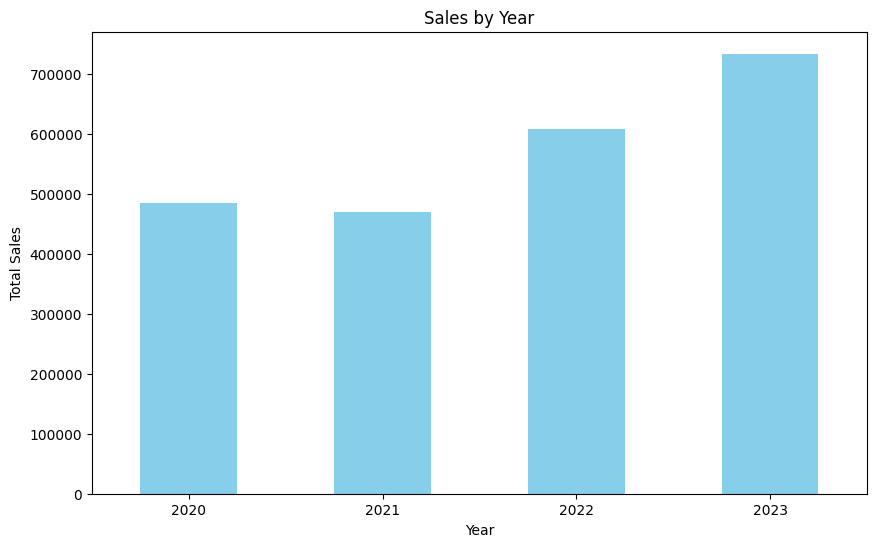

In [21]:
df['Year'] = df['Order Date'].dt.year
plt.figure(figsize=(10, 6))
df.groupby('Year')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

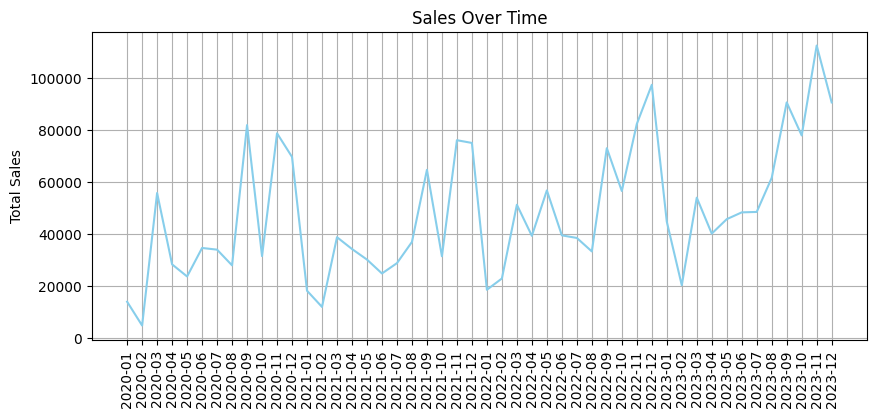

In [27]:
df['Year'] = df['Order Date'].dt.year
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x="YearMonth", y="Sales", data=monthly_sales, color='skyblue')
plt.title("Sales Over Time")
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Total Sales")
plt.grid()
plt.show()

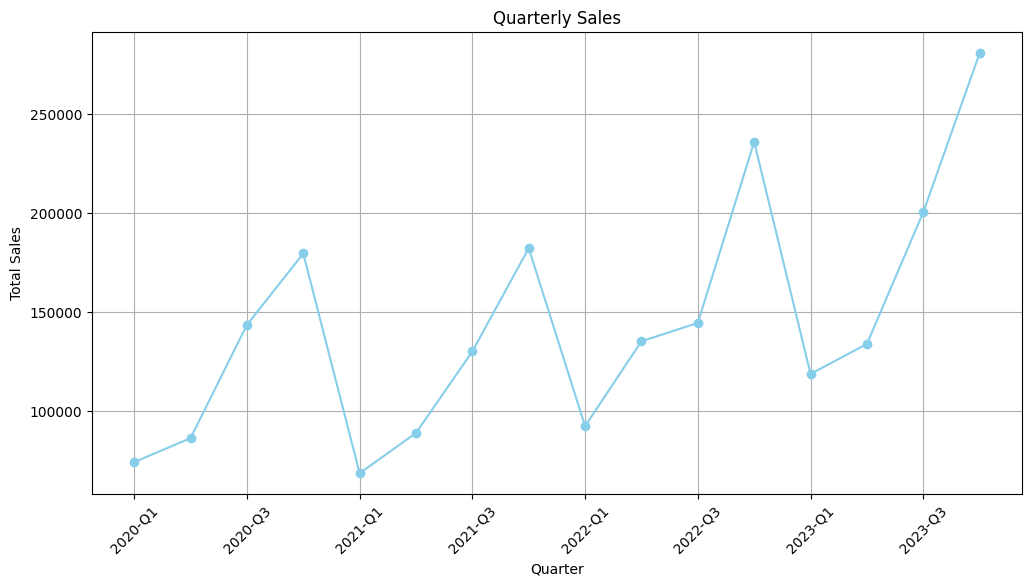

In [24]:
df['Year'] = df['Order Date'].dt.year
df['YearQuarter'] = df['Order Date'].dt.to_period('Q').dt.strftime('%Y-Q%q')

quarterly_sales = df.groupby('YearQuarter')['Sales'].sum()

plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Sales by Year, by Product

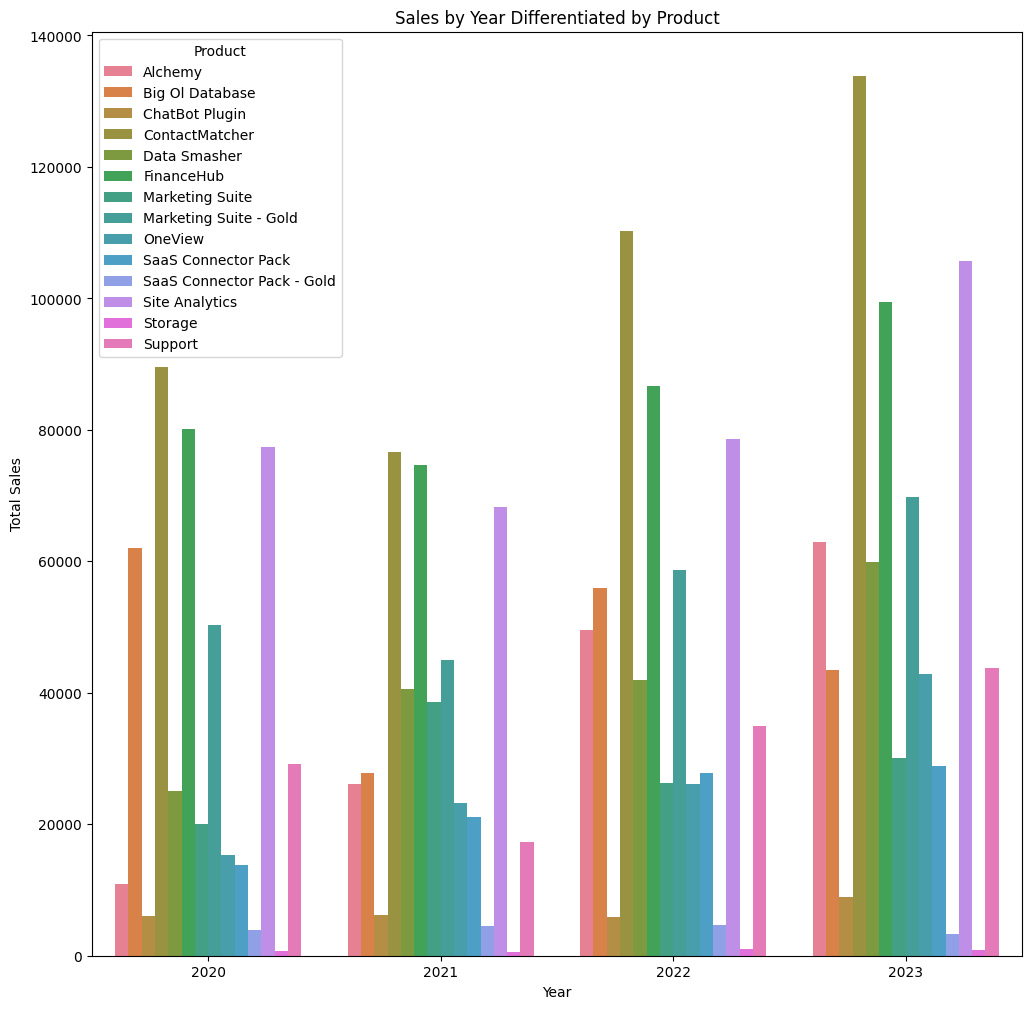

In [25]:
df['Year'] = df['Order Date'].dt.year

year_product_sales = df.groupby(['Year', 'Product'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 12))
sns.barplot(data=year_product_sales, x='Year', y='Sales', hue='Product')
plt.title('Sales by Year Differentiated by Product')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()

### Profit

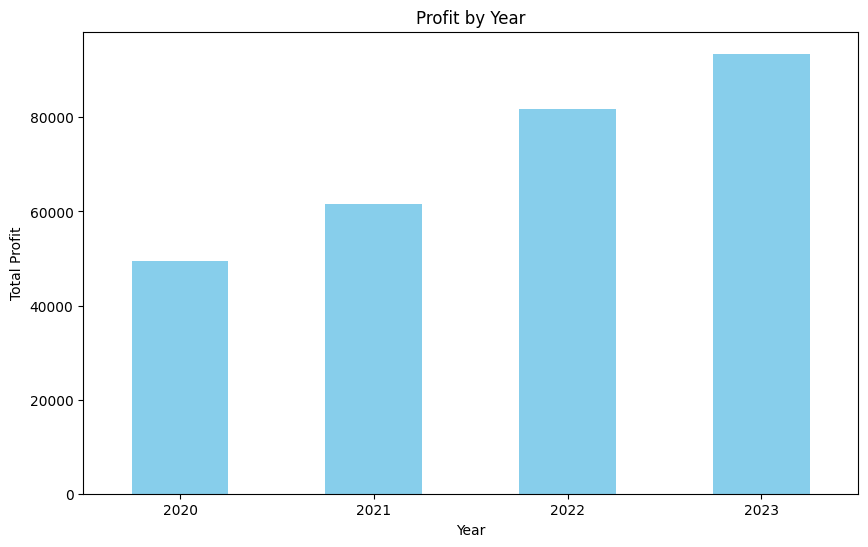

In [28]:
df['Year'] = df['Order Date'].dt.year
plt.figure(figsize=(10, 6))
df.groupby('Year')['Profit'].sum().plot(kind='bar', color='skyblue')
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()

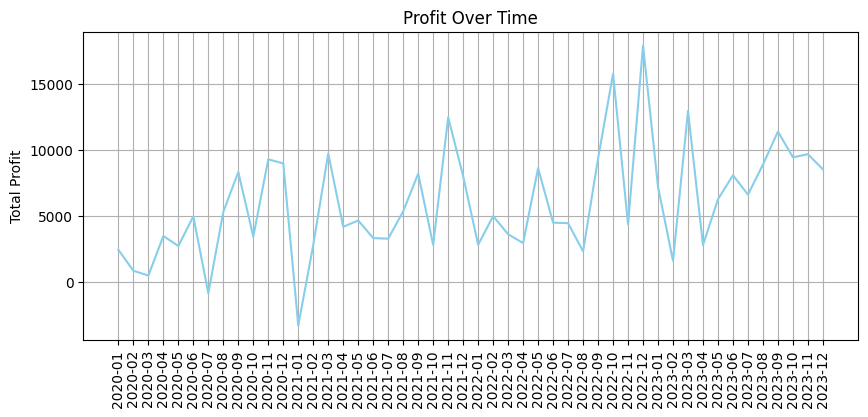

In [30]:
df['Year'] = df['Order Date'].dt.year
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_profit = df.groupby('YearMonth')['Profit'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x="YearMonth", y="Profit", data=monthly_profit, color='skyblue')
plt.title("Profit Over Time")
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Total Profit")
plt.grid()
plt.show()

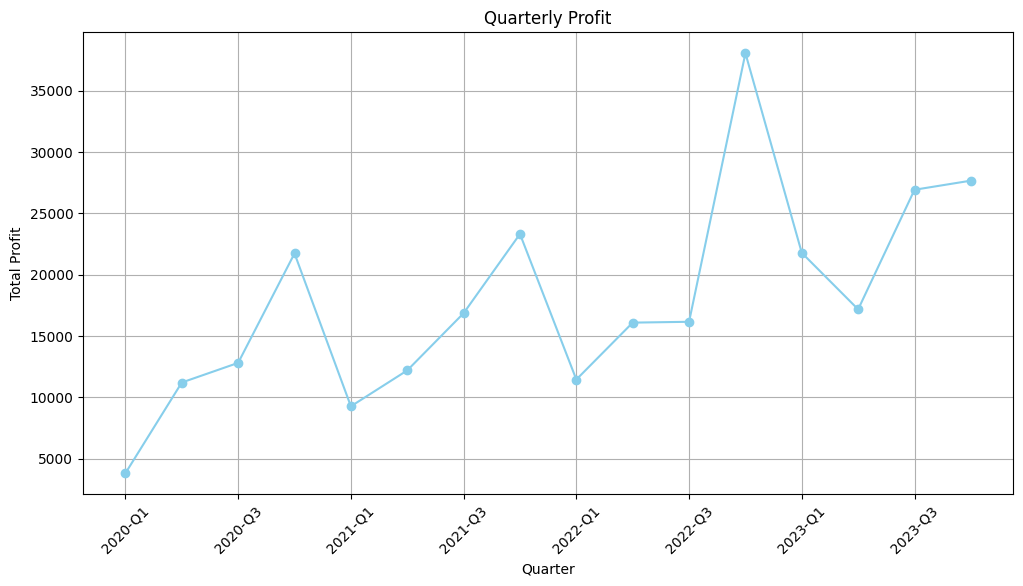

In [32]:
df['Year'] = df['Order Date'].dt.year
df['YearQuarter'] = df['Order Date'].dt.to_period('Q').dt.strftime('%Y-Q%q')

quarterly_profit = df.groupby('YearQuarter')['Profit'].sum()

plt.figure(figsize=(12, 6))
quarterly_profit.plot(kind='line', marker='o', color='skyblue')
plt.title('Quarterly Profit')
plt.xlabel('Quarter')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Checking profit contribution per product

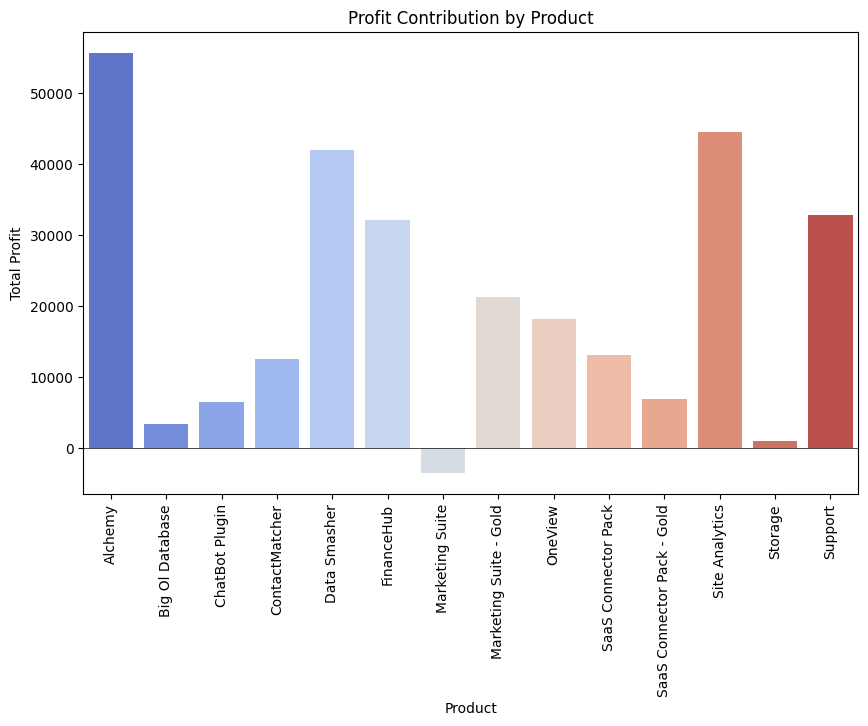

In [ ]:
product_profit = df.groupby('Product')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=product_profit, x='Product', y='Profit', palette="coolwarm")
plt.axhline(0, color='black', linewidth=0.5)  # Add a line at 0 for easy visualization
plt.title('Profit Contribution by Product')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Total Profit')
plt.show()

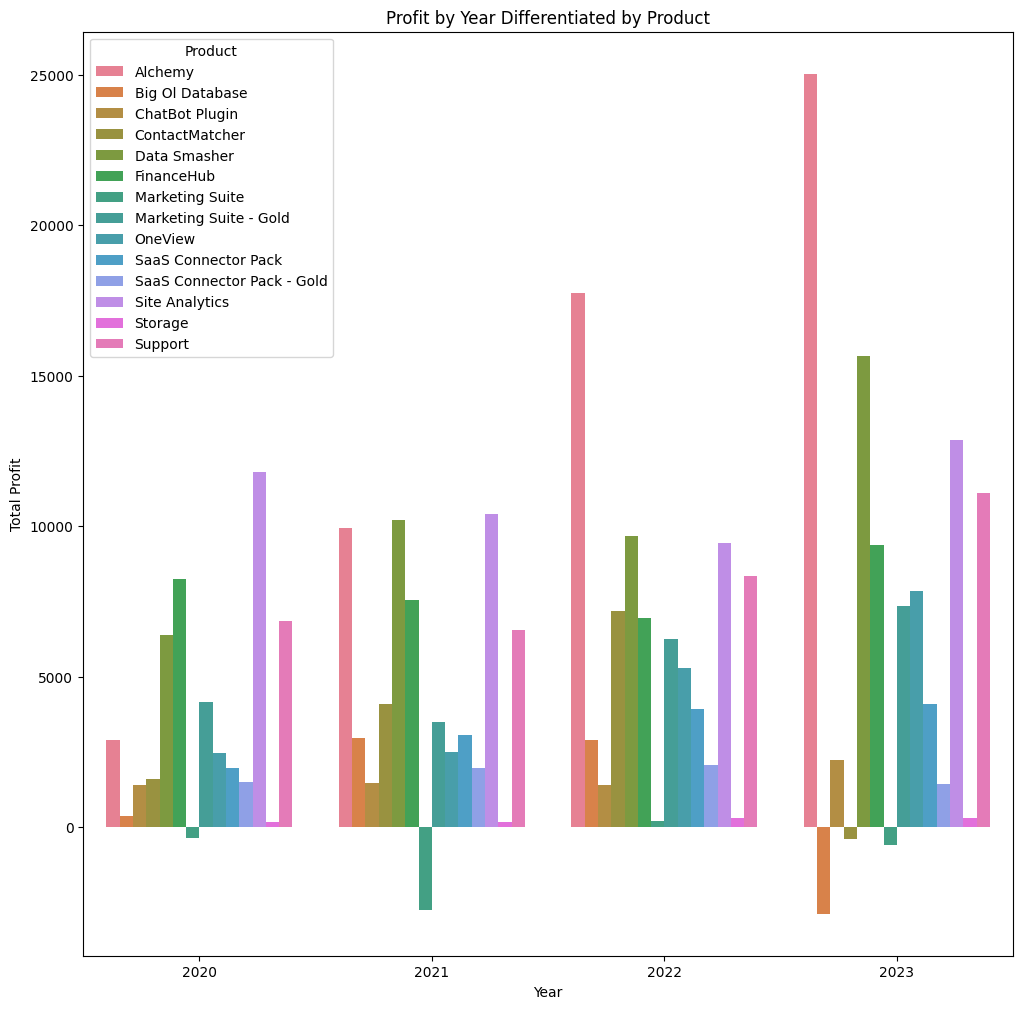

In [35]:
df['Year'] = df['Order Date'].dt.year

year_product_profit = df.groupby(['Year', 'Product'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 12))
sns.barplot(data=year_product_profit, x='Year', y='Profit', hue='Product')
plt.title('Profit by Year Differentiated by Product')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Product')
plt.show()

#### Product Analysis for Marketing Suite

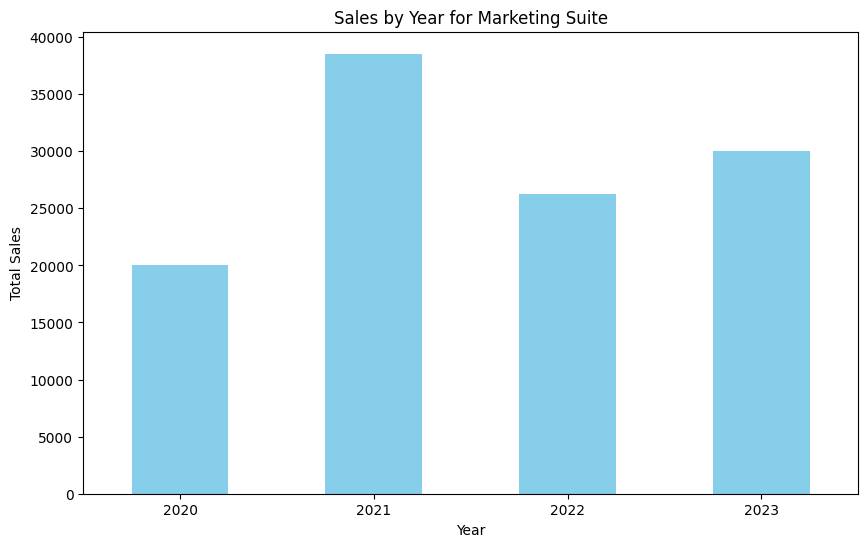

In [ ]:
df_MarketingSuite = df[df['Product'] == 'Marketing Suite']

df_MarketingSuite['Year'] = df['Date Key'].dt.year
plt.figure(figsize=(10, 6))
df_MarketingSuite.groupby('Year')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Sales by Year for Marketing Suite')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

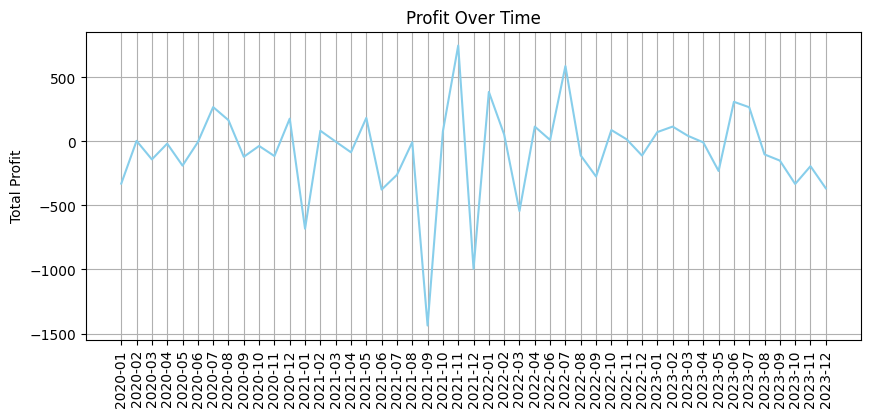

In [36]:
df_MarketingSuite = df[df['Product'] == 'Marketing Suite']
df_MarketingSuite['Year'] = df_MarketingSuite['Order Date'].dt.year
df_MarketingSuite['YearMonth'] = df_MarketingSuite['Order Date'].dt.to_period('M').astype(str)

monthly_profitMS = df_MarketingSuite.groupby('YearMonth')['Profit'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x="YearMonth", y="Profit", data=monthly_profitMS, color='skyblue')
plt.title("Profit Over Time")
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Total Profit")
plt.grid()
plt.show()

In [ ]:
df_LossProduct = df[df['Profit'] <= 0]
df_LossProduct.value_counts('Product')

Product
ContactMatcher            818
FinanceHub                255
Marketing Suite - Gold    185
SaaS Connector Pack       176
Site Analytics            138
Marketing Suite           111
Data Smasher               92
OneView                    67
Big Ol Database            44
Support                    33
Storage                    17
Name: count, dtype: int64

In [ ]:
df_LossProduct = df[df['Profit'] <= 0]
df_LossProduct.sort_values('Profit', ascending=True)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
7772,7773,AMER-2022-108196,11/26/2022,2022-11-26,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780,2022
683,684,EMEA-2023-168116,11/5/2023,2023-11-05,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904,2023
9774,9775,APJ-2020-169019,7/26/2020,2020-07-26,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928,2020
3011,3012,EMEA-2023-134845,4/18/2023,2023-04-18,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800,2023
4991,4992,APJ-2023-122714,12/8/2023,2023-12-08,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172,3173,APJ-2022-133879,3/22/2022,2022-03-22,Liam Burgess,Australia,Sydney,APJ,ANZ,Toyota Motor,1087,Manufacturing,SMB,FinanceHub,TAIFGDIPM3,528.430,5,0.3,0.0000,2022
3026,3027,EMEA-2023-169054,4/23/2023,2023-04-23,Joshua Lyman,France,Paris,EMEA,EU-WEST,Fannie Mae,1035,Finance,Enterprise,SaaS Connector Pack,QNM3BQU931,254.352,3,0.2,0.0000,2023
3730,3731,APJ-2021-109575,9/18/2021,2021-09-18,Sebastian Brown,China,Shenzhen,APJ,APAC,Phillips 66,1056,Energy,Strategic,Marketing Suite - Gold,DC69ISAN9F,636.860,7,0.0,0.0000,2021
9977,9978,AMER-2022-103674,12/7/2022,2022-12-07,Lisa Peake,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,Enterprise,Storage,Z4851OU2FZ,13.860,7,0.0,0.0000,2022


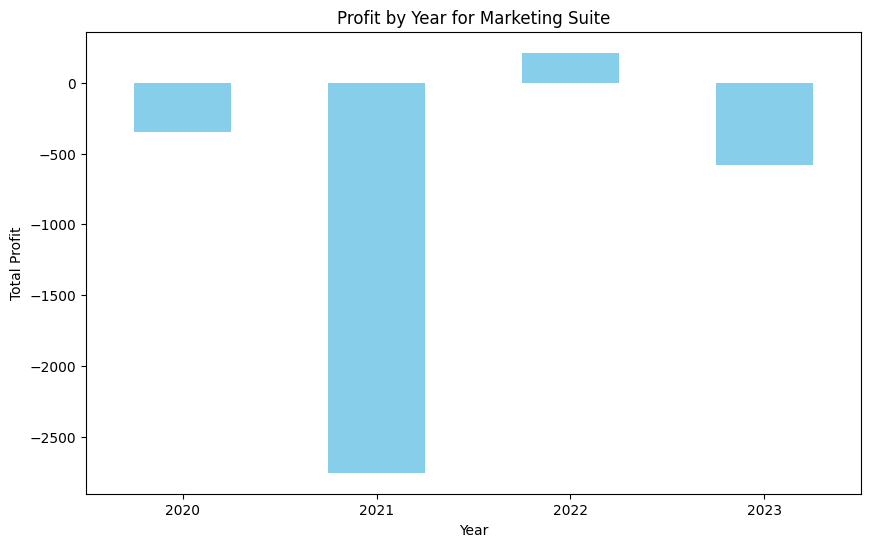

In [ ]:
df_LossProduct = df[df['Profit'] <= 0]

df_MarketingSuite['Year'] = df['Date Key'].dt.year
plt.figure(figsize=(10, 6))
df_MarketingSuite.groupby('Year')['Profit'].sum().plot(kind='bar', color='skyblue')
plt.title('Profit by Year for Marketing Suite')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()

In [ ]:
SalesbyProduct = df_LossProduct.groupby('Product')['Sales'].sum()
SalesbyProduct

Product
Big Ol Database            72456.2530
ContactMatcher            142122.8120
Data Smasher               10983.4720
FinanceHub                107578.9620
Marketing Suite            48513.0528
Marketing Suite - Gold     46284.2700
OneView                     3382.5340
SaaS Connector Pack        14808.6200
Site Analytics             36013.1600
Storage                      183.6900
Support                    14067.1760
Name: Sales, dtype: float64

In [ ]:
LossbyProduct = df_LossProduct.groupby('Product')['Profit'].sum()
LossbyProduct

Product
Big Ol Database          -30118.6682
ContactMatcher           -70922.6447
Data Smasher               -930.6265
FinanceHub                -9880.8413
Marketing Suite          -12152.2060
Marketing Suite - Gold    -6426.3038
OneView                   -8629.6412
SaaS Connector Pack       -6490.9134
Site Analytics            -7530.6235
Storage                     -33.1952
Support                   -3015.6219
Name: Profit, dtype: float64

In [ ]:
Difference = SalesbyProduct - LossbyProduct
Difference.sort_values()

Product
Storage                      216.8852
Data Smasher               11914.0985
OneView                    12012.1752
Support                    17082.7979
SaaS Connector Pack        21299.5334
Site Analytics             43543.7835
Marketing Suite - Gold     52710.5738
Marketing Suite            60665.2588
Big Ol Database           102574.9212
FinanceHub                117459.8033
ContactMatcher            213045.4567
dtype: float64

In [ ]:
Percentage = LossbyProduct/SalesbyProduct
Percentage

Product
Big Ol Database          -0.415681
ContactMatcher           -0.499024
Data Smasher             -0.084730
FinanceHub               -0.091847
Marketing Suite          -0.250494
Marketing Suite - Gold   -0.138844
OneView                  -2.551236
SaaS Connector Pack      -0.438320
Site Analytics           -0.209108
Storage                  -0.180713
Support                  -0.214373
dtype: float64

Dapat dilihat, untuk produk Marketing Suite walaupun angka sales cukup tinggi, namun pada 2020 - 2023, lebih sering menghasilkan kerugian. Dengan demikain, jika dihitung secara total profit untuk keseluruhan produk, karena Marketing Suite rugi, maka akan membuat profit perusahaan lebih kecil. Untuk mengoptimalkan operasional, perusahaan dapat memberhentikan penjualan produk Marketing Suite dan lebih fokus kepada produk lain yang lebih menguntungkan.

### Profit by Year

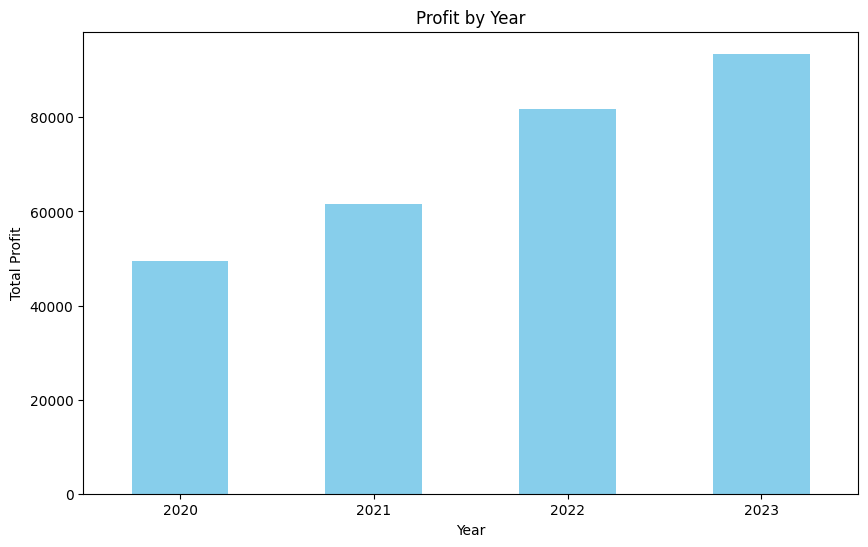

In [ ]:
df['Year'] = df['Date Key'].dt.year
plt.figure(figsize=(10, 6))
df.groupby('Year')['Profit'].sum().plot(kind='bar', color='skyblue')
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()